In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

In [13]:
# importing a library to handle csv files
data=pd.read_csv('Air_Quality_Continuous.csv')

In [14]:
# Filter the data from 1st January 2015 on 
data = data[data['Date_Time'] >= '2015/01/01 00:00:00+00']

# Filter the data by date between 1st January 2015 to 22nd October 2023 
data = data[(data['Date_Time'] >= '2015/01/01 00:00:00+00') & (data['Date_Time'] <= '2023/10/22 24:00:00+00')]

# Create a new column for checking duplicate value as each site id at a specific time must be only one value so new column need to be unique
data.loc[:, 'merged'] = data[['Date_Time', 'Site_ID']].astype(str).agg('-'.join, axis=1)

In [15]:
#using panda library we just remove all the duplicate values from new column 

data = data.drop_duplicates(subset='merged', keep='first')


In [16]:
#now checking is there any null value in the 'new' dataset

missing_sum = data['merged'].isna().sum().sum()
print(f"Total missing values in data_cleansed of column new: {missing_sum}")

missing_sum1 = data['Site_ID'].isna().sum().sum()
print(f"Total missing values in data_cleansed of column new: {missing_sum1}")

#Drop the null value fro Site_id column

data.dropna(subset=['Site_ID'], inplace=True)
print('done')

Total missing values in data_cleansed of column new: 0
Total missing values in data_cleansed of column new: 1
done


In [17]:

#Replacing the Negative value first then missing and null value withh 0 because Database cant take Nan value! .

#First take columns where we need to check the negative value and change the value 
columns = ['NOx','NO2', 'NO', 'PM10', 'O3', 'NVPM10', 'VPM10', 'NVPM2_5', 'PM2_5', 'VPM2_5', 'RH']
#secondly take another column1 where we change all the null value and missing value to 0 because mysql database dont take empty value.
columns1 = ['NOx','NO2', 'NO', 'PM10', 'O3','Temperature', 'ObjectId', 'NVPM10', 'VPM10', 'NVPM2_5', 'PM2_5', 'VPM2_5', 'RH', 'CO', 'Pressure', 'SO2']

for col in columns:
    data[col] = data[col].clip(lower=0)  # Replace all negative values with 0
for col1 in columns1:
    data[col1].fillna(0, inplace=True)  # Replace all null or missing values with 0

#checking the info of the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 520317 entries, 0 to 1603491
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date_Time    520317 non-null  object 
 1   Site_ID      520317 non-null  float64
 2   NOx          520317 non-null  float64
 3   NO2          520317 non-null  float64
 4   NO           520317 non-null  float64
 5   PM10         520317 non-null  float64
 6   O3           520317 non-null  float64
 7   Temperature  520317 non-null  float64
 8   ObjectId     520317 non-null  float64
 9   ObjectId2    520317 non-null  int64  
 10  NVPM10       520317 non-null  float64
 11  VPM10        520317 non-null  float64
 12  NVPM2_5      520317 non-null  float64
 13  PM2_5        520317 non-null  float64
 14  VPM2_5       520317 non-null  float64
 15  CO           520317 non-null  float64
 16  RH           520317 non-null  float64
 17  Pressure     520317 non-null  float64
 18  SO2          520317 non-null

In [19]:
#checking the info of the data

print(data.info())

# Here we see that our date_time is not correct data type so we transform this now.
data['Date_Time']=pd.to_datetime(data['Date_Time'])

#Convert the ‘Date_Time’ column to a timezone-naive format that MySQL can recognize
data['Date_Time'] = pd.to_datetime(data['Date_Time']).dt.tz_convert(None)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 520317 entries, 0 to 1603491
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Date_Time    520317 non-null  datetime64[ns]
 1   Site_ID      520317 non-null  float64       
 2   NOx          520317 non-null  float64       
 3   NO2          520317 non-null  float64       
 4   NO           520317 non-null  float64       
 5   PM10         520317 non-null  float64       
 6   O3           520317 non-null  float64       
 7   Temperature  520317 non-null  float64       
 8   ObjectId     520317 non-null  float64       
 9   ObjectId2    520317 non-null  int64         
 10  NVPM10       520317 non-null  float64       
 11  VPM10        520317 non-null  float64       
 12  NVPM2_5      520317 non-null  float64       
 13  PM2_5        520317 non-null  float64       
 14  VPM2_5       520317 non-null  float64       
 15  CO           520317 non-null  float64 

TypeError: Cannot convert tz-naive timestamps, use tz_localize to localize

In [33]:
#Drop the created column which we use for checking any duplicates values.

 data = data.drop(columns=['merged'])

#Create new column Reading_id where it will show the row number and it will be unique.

data['Reading_id'] = data.reset_index().index + 1

# Make it the first column

data = data[['Reading_id'] + [col for col in data.columns if col != 'Reading_id']]

#Also rename the Site_ID to Site_id that will matched with the Station Site_id then.

data = data.rename(columns={'Site_ID': 'Site_id'})

In [34]:
#checking the info of the data

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 520317 entries, 0 to 1603491
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   Reading_id   520317 non-null  int64              
 1   Date_Time    520317 non-null  datetime64[ns, UTC]
 2   Site_id      520317 non-null  float64            
 3   NOx          520317 non-null  float64            
 4   NO2          520317 non-null  float64            
 5   NO           520317 non-null  float64            
 6   PM10         520317 non-null  float64            
 7   O3           520317 non-null  float64            
 8   Temperature  107573 non-null  float64            
 9   ObjectId     0 non-null       float64            
 10  ObjectId2    520317 non-null  int64              
 11  NVPM10       520317 non-null  float64            
 12  VPM10        520317 non-null  float64            
 13  NVPM2_5      520317 non-null  float64            
 14  PM2_5   

In [35]:
#now save the file in csv format.

data.to_csv('Cropped and Cleansed Data.csv', index=False,encoding='utf-8')

In [6]:
df=pd.read_csv("Cropped and Cleansed Data.csv")

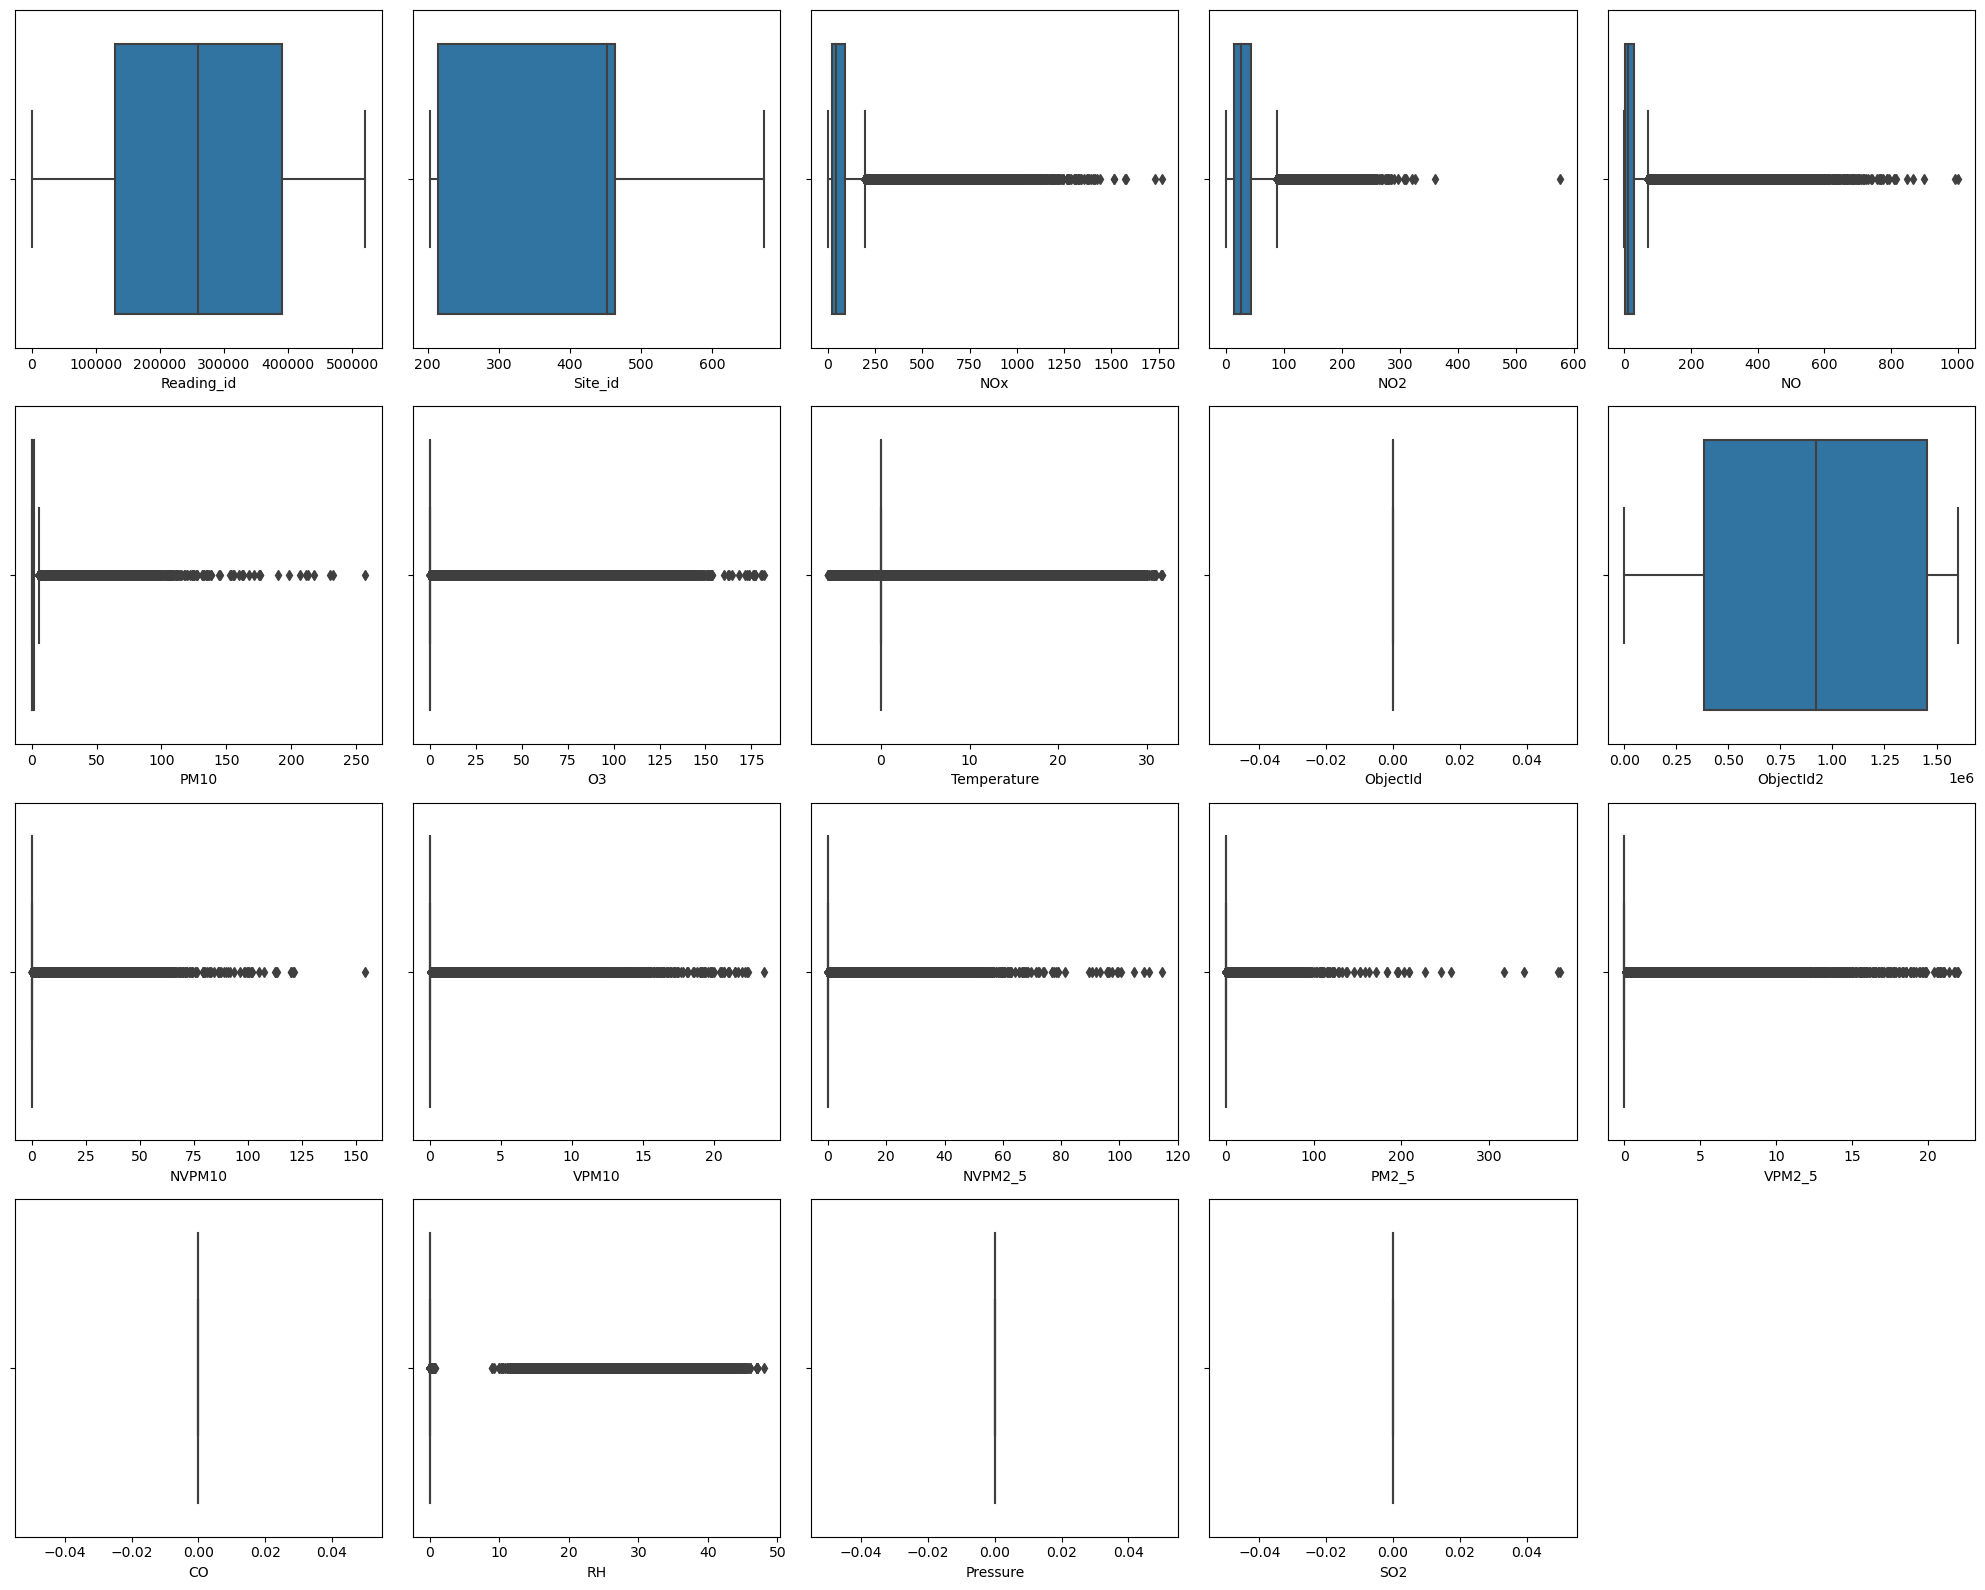

In [10]:
def plot_boxplots(df):
    # select only numeric columns
    df_numeric = df.select_dtypes(include=[np.number])
    
    num_plots = len(df_numeric.columns)
    num_cols = math.ceil(math.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols*4,num_rows*4))

    for i, col in enumerate(df_numeric.columns):
        ax = axs.flat[i]
        sns.boxplot(x=df_numeric[col], ax=ax)
        
    # remove the empty subplot(s) if any
    for ax in axs.flat[num_plots:]:
        ax.remove()

    plt.tight_layout()
    plt.show()

plot_boxplots(df)